<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/dz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Центральная предельная теорема. 

Как применить законы статистики к данным ? 
Сколько элементов сумм использовано в коде?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

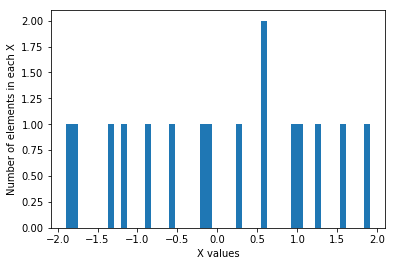

In [2]:
number_of_sums = 16
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
  X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

# Матрица ковариаций

Чему равна матрица ковариаций для графика?

[[ 0.44069231 -0.82514915 -0.88625973 ... -1.18372256  1.75969624
  -1.24962194]
 [-0.42270866 -0.29223262  0.8998711  ...  0.14200492 -1.57169562
   0.93820566]]


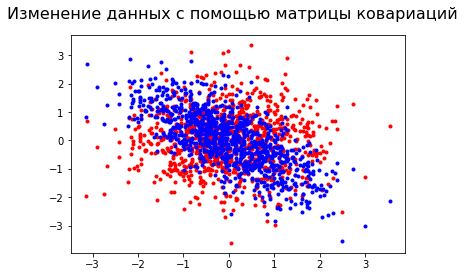

In [3]:
import numpy.linalg as la
n = 1000
C = [[1,-0.7],[-0.7,1]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')
print(Y)

# Разброс данных 2 способами: теоритически и практически

Построить преобразование с помощью вычисленной выше матрицей

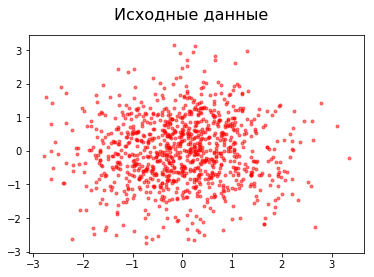

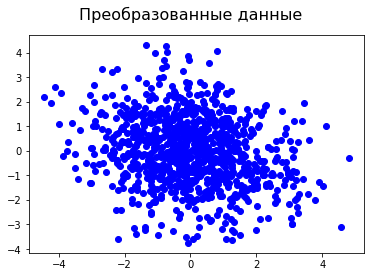

In [4]:
mu, sigma = 0, 1 # mean and standard deviation
# x = np.random.normal(mu, sigma, 100)
x = np.matrix(np.random.normal(0, 1, size=(1000, 2)))
c = c = np.matrix('2 -0.5; -0.5 2')
a = np.linalg.cholesky(c)
y = x * a
plt.suptitle('Исходные данные', fontsize=16) 
plt.plot(x[:, 0], x[:, 1], linestyle='None', color="red", marker=".", alpha=0.5) 
plt.show()
plt.suptitle('Преобразованные данные', fontsize=16) 
plt.plot(y[:, 0], y[:, 1], linestyle='None', color="blue", marker="o", alpha=1)
plt.show()

Посчитать угол наклона полученного распределения (визуально) в радианах и посчитать разброс данных теоритически и практически

In [5]:
import math
theta = 135
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = y*u
var_empirical = np.var(yp)
var_theoretical = np.transpose(u)*c*u
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)



генерация данных:  1.9945512640856609
теоритический подсчет:  [[2.08802297]]


In [ ]:
# так как это противоположный угол 45  я посчитал угол как 180 - 45. Верно?

При  большом количестве данных эти показатели должны быть равны. Достаточно ли мы данных сгенерировали?

In [ ]:
# У меня получились данные почти равны - делаю вывод что почти достаточно:)

Посчитать как меняется вариация в зависимости от выбора собственного вектора

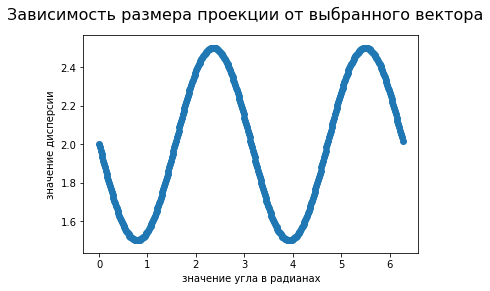

In [6]:
degrees360 = [2*math.pi/360*i for i in range(360)]
variances = []
for i in degrees360:
    theta = i
    u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
    yp = y*u
    var_empirical = np.var(yp)
    var_theoretical = np.transpose(u)*c*u
    variances.append(var_theoretical)

plt.suptitle('Зависимость размера проекции от выбранного вектора', fontsize=16)    
plt.xlabel('значение угла в радианах')
plt.ylabel('значение дисперсии')
plt.scatter(degrees360, variances)
plt.show()

In [ ]:
#Макс разброс - 143 градуса, Мин разброс = 45 градусов

# Работа с данными данные

Загрузить таблицу. 

In [7]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


Построить корелляцию для всех типов авокадо (их там три). Построить графики histograms и плотность распределения (смотрим примеры из лекций).

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', '4225', '4770']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1         2
0 -0.999909 -0.994680 -0.999962
1 -0.999941 -0.995639 -0.999954
2 -0.999930 -0.989336 -0.999898
3 -0.999900 -0.992968 -0.999943
4 -0.999917 -0.995717 -0.999940


In [9]:
type_4046 = df_norm[0]
type_4225 = df_norm[1]
type_4770 = df_norm[2]
df_norm.columns = ['type_4046', 'type_4225', 'type_4770']
df_norm.head()

,type_4046,type_4225,type_4770
0,-0.999909,-0.994680,-0.999962
1,-0.999941,-0.995639,-0.999954
2,-0.999930,-0.989336,-0.999898
3,-0.999900,-0.992968,-0.999943
4,-0.999917,-0.995717,-0.999940


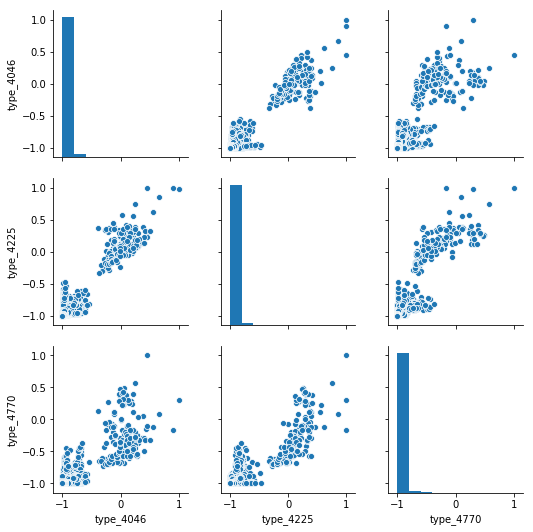

In [10]:
import seaborn as sns
sns.pairplot(df_norm)

In [51]:
# наблюдаем корелляцию между продажами разных авокадо.

Посчитать матрицу ковариаций. Как из нее получить собственные вектора и собственные числа?

1
[[1.36719418e-05 1.12478035e-05]
 [1.12478035e-05 9.25348315e-06]]
2
[[1.42269467e-09 3.59553221e-10]
 [3.59553221e-10 9.08687732e-11]]
3
[[1.39522982e-05 1.13981484e-05]
 [1.13981484e-05 9.31156894e-06]]
2.2925424937466838e-05 [0.77224731 0.63532204]


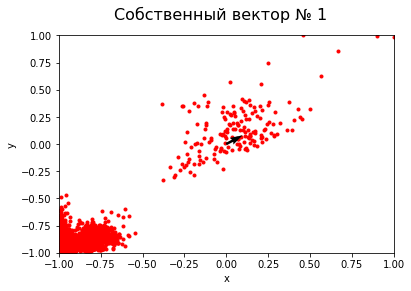

0.0 [-0.63532204  0.77224731]


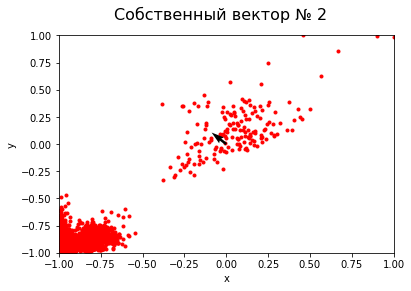

In [11]:
# посчитать ковариацию переменных (разброс относительно друг друга)
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# матрица ковариаций
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# матрицы ковариаций

X_1 = np.vstack((type_4046, type_4225))
print(1)
print(cov_mat(X_1.T))

X_2 = np.vstack((type_4046, type_4770))
print(2)
print(cov_mat(X_2.T))

X_3 = np.vstack((type_4225, type_4770))
print(3)
print(cov_mat(X_3.T))

#собственный вектор для (type_4046 и type_4225)
n=1000
Cb = cov_mat(X_1.T)

w,v = la.eig(Cb)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(X_1[0,:], X_1[1,:], 'r.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

1.5135634411966643e-09 [0.96951724 0.24502309]


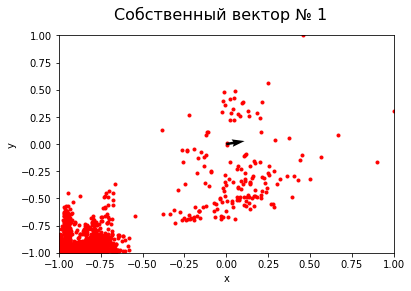

-2.5849394142282115e-26 [-0.24502309  0.96951724]


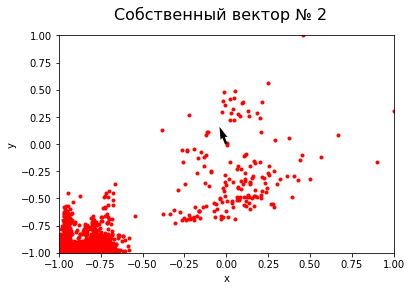

In [12]:
Cb = cov_mat(X_2.T)

w,v = la.eig(Cb)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(X_2[0,:], X_2[1,:], 'r.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

2.326386709444647e-05 [0.77442956 0.63266015]


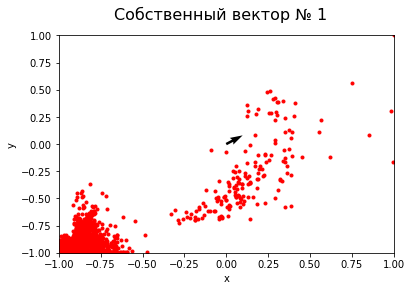

-1.6940658945086007e-21 [-0.63266015  0.77442956]


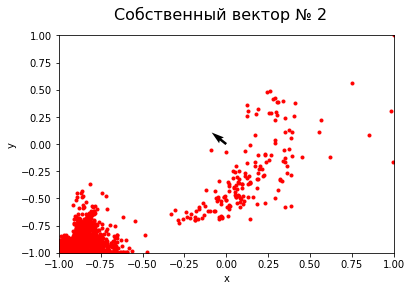

In [13]:
Cb = cov_mat(X_3.T)

w,v = la.eig(Cb)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(X_3[0,:], X_3[1,:], 'r.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Линейное преобразование значений (проекция на ось).

На какую прямую проецируем?

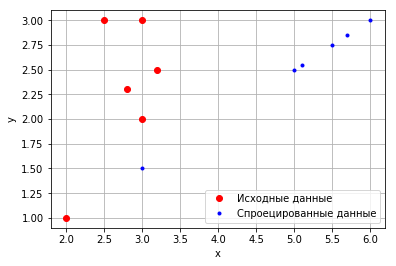

In [14]:
Xc = np.array([[2,1],[3,2],[3,3],[2.5,3],[2.8,2.3],[3.2,2.5]])
 # проецирование на какую прямую
P = np.array([[1,0.5],[1,0.5]])
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
#plt.axis([0,4,0,4])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

# Теория вероятности

Напишите код для моделирования 100 подбрасываний игрального кубика. Начертите диаграму histogram. 

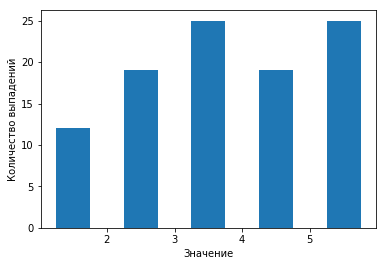

In [15]:

import random
number_of_trials =100
list_of_values = []
for i in range(number_of_trials):
    list_of_values.append(random.randint( 1,6))

    
side=[1,2,3,4,5,6]    
plt.hist(list_of_values, side, rwidth=0.5)
plt.xlabel('Значение')
plt.ylabel('Количество выпадений')
plt.show()